In [1]:
# You must run this cell, but you can ignore its contents.

import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

In [2]:
# You must also run this cell.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization first steps

We are going to take our first steps towards optimization by returning to a bumblebee example.

We are going to define the positions of a flower and the flight path of a bumblebee.

In [3]:
flower = np.array([7.5, 10.3])

In [4]:
def make_bee_track(t):
    pos0 = (-10,3)
    velocity = (4.0, 0.2)
    pos_x = pos0[0] + t*velocity[0]
    pos_y = pos0[1] + t*velocity[1]
    return np.array([pos_x,pos_y])

t = np.linspace(0,15,20)
bee_track = make_bee_track(t)

Here we plot these positions.

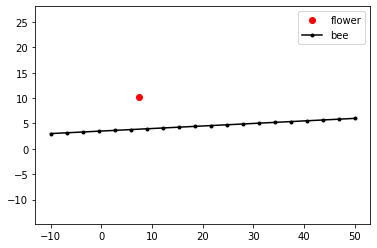

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( [flower[0]], [flower[1]], 'or', label='flower' )
ax.plot( bee_track[0], bee_track[1], '.-k', label='bee')
ax.axis('equal')
ax.legend();

## Q1 Draw a figure as above with, additionally, a blue line between each point on `bee_track` and `flower`.

When complete, your figure should look like this:

![bee-dist.png](bee-dist.png)

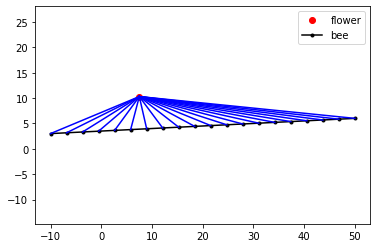

In [6]:
# Your code here. Check it is correct by comparing your figure with the above.
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( [flower[0]], [flower[1]], 'or', label='flower' )
ax.plot( bee_track[0], bee_track[1], '.-k', label='bee')
for i in range(bee_track.shape[1]):
    bee_pos = bee_track[:,i]
    ax.plot( [flower[0], bee_pos[0]], [flower[1], bee_pos[1]], 'b-' )
ax.axis('equal')
ax.legend();
#fig.savefig('bee-dist.png')

## Q2 compute the distance between each point on `bee_track` and `flower`. Put the results in a 1D numpy array called `distance`.

Hint: recall the function you wrote in the "bumblebee traplines" exercise called `my_distance`.

In [7]:
# Enter code here
def my_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

distance = np.zeros(bee_track.shape[1])
for i in range(bee_track.shape[1]):
    bee_pos = bee_track[:,i]
    distance[i] = my_distance(bee_pos, flower )
display(distance)

array([18.96154002, 16.02203642, 13.18581669, 10.53661864,  8.256474  ,
        6.73148224,  6.5154281 ,  7.71901634,  9.83412849, 12.40287921,
       15.19694713, 18.11235632, 21.09886634, 24.13009179, 27.19108233,
       30.27281036, 33.36953095, 36.47742595, 39.59386407, 42.71697555])

In [8]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(np.round(distance*1000).astype(np.int))=='54f4f2edcb'

## Q3 make a plot of the bee track parameter `t` on the X axis and `distance` on the Y axis.

It should look like this:

![t-vs-dist.png](t-vs-dist.png)

Text(0, 0.5, 'distance')

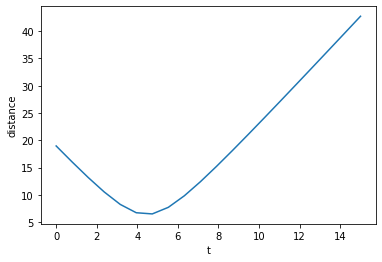

In [9]:
# Your code here. Check it is correct by comparing your figure with the above.
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( t, distance )
ax.set_xlabel('t')
ax.set_ylabel('distance')
#fig.savefig('t-vs-dist.png')

## Q4 Using `DistanceFinder` from the lecture, find the value of `t` that minimizes the distance between the bee and the flower. Save the result in `best_t`.

In [10]:
# Your code here. 

class DistanceFinder:
    def __init__(self, flower):
        self.flower = flower
    def calc_distance(self, t):
        x1, y1 = self.flower
        x2, y2 = make_bee_track(t)
        dist = my_distance((x1,y1), (x2,y2))
        print('t: {} -> dist: {}'.format(t,dist))
        return dist
    
distance_finder = DistanceFinder(flower)

import scipy.optimize
result = scipy.optimize.minimize_scalar(distance_finder.calc_distance)
print(result)
best_t = result.x

t: 0.0 -> dist: 18.96154002184422
t: 1.0 -> dist: 15.253196386331622
t: 2.6180339999999998 -> dist: 9.762703375781847
t: 15.908845000462023 -> dist: 46.31882030539557
t: 2.6180339999999998 -> dist: 9.762703375781847
t: 7.694671914602477 -> dist: 14.474578507642399
t: 4.55713707768905 -> dist: 6.429979961714315
t: 4.606244750761416 -> dist: 6.44546748591665
t: 4.427556823536537 -> dist: 6.417932686426614
t: 3.7363806287215797 -> dist: 7.03303244654773
t: 4.454999062553287 -> dist: 6.416983793293304
t: 4.455122430031719 -> dist: 6.416983777420453
t: 4.455112223273879 -> dist: 6.416983777290153
t: 4.455112157328219 -> dist: 6.416983777290158
t: 4.45511228921954 -> dist: 6.416983777290159
     fun: 6.416983777290153
    nfev: 15
     nit: 10
 success: True
       x: 4.455112223273879


In [11]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(np.round(best_t*1000).astype(np.int))=='dec1ab2f6d'

In [12]:
make_bee_track(best_t)

array([7.82044889, 3.89102244])

## Q5 What is the position of the bee when it is closest to the flower? Save the result as a numpy array in `best_pos`.

In [13]:
# Your code here. 
best_pos = make_bee_track(best_t)

In [14]:
# If this runs without error, it means the answer in your previous cell was correct.
assert type(best_pos)==np.ndarray
assert best_pos.ndim==1
assert best_pos.shape==(2,)
assert ads_hash(np.round(best_pos[0]*1000).astype(np.int))=='e33b9415bc'
assert ads_hash(np.round(best_pos[1]*1000).astype(np.int))=='f71cbfce4c'